In [149]:
#!pip install opencv-python
#!pip install tensorflow
#!pip install keras

import numpy as np
import tensorflow as tf
import builtins
import os
import pickle
import time
import pylab
import cv2
import keras
import sys
import random

from matplotlib import gridspec
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras import backend as K
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
%matplotlib inline
random.seed(0)

In [150]:
dim = (640, 640)
step = 32
count = 400
num_classes = 10
classes = 4

# 0 - принадлежность
# 1 - пересечение
# 2 - объединение
# 3 - пустое множество

In [151]:


y_train = np.ndarray((2 * count,))
y_test = np.ndarray((count,))

for i in range(count):
    if i < 100:
        y_train[i] = 0
        y_test[i] = 0
    elif i < 200:
        y_train[i] = 1
        y_test[i] = 1
    elif i < 300:
        y_train[i] = 2
        y_test[i] = 2
    elif i < 400:
        y_train[i] = 3
        y_test[i] = 3

k = 400
for i in range(20):
    for j in range(20):
        if (i < 10) & (j < 10):
            y_train[k] = 3
        elif (i < 10) & (j >= 10):
            y_train[k] = 0
        elif (i >= 10) & (j < 10):
            y_train[k] = 1
        elif (i >= 10) & (j >= 10):
            y_train[k] = 2
        k += 1



Драчев Матвей

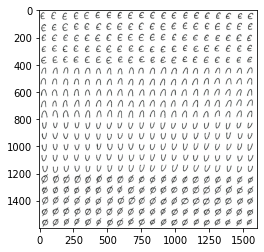

In [152]:
Drachev_image = cv2.imread("test.jpg")
plt.imshow(Drachev_image)

In [153]:
Drachev_image.shape

(1600, 1600, 3)

In [154]:
resized_Drachev_image = cv2.resize(Drachev_image, dim, interpolation = cv2.INTER_AREA)

0.0


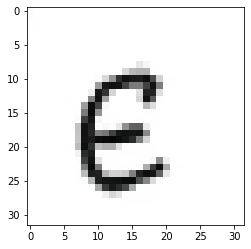

In [155]:
list_Drachev_im = []

for i in range(0, resized_Drachev_image.shape[0], step):
    for j in range(0, resized_Drachev_image.shape[0], step):
        list_Drachev_im.append(resized_Drachev_image[i:i + step, j:j + step])

plt.imshow(list_Drachev_im[90])
print(y_train[90])

1.0


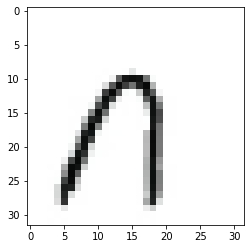

In [156]:

plt.imshow(list_Drachev_im[130])
print(y_train[130])

1.0


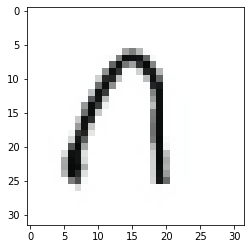

In [157]:
plt.imshow(list_Drachev_im[190])
print(y_train[190])

3.0


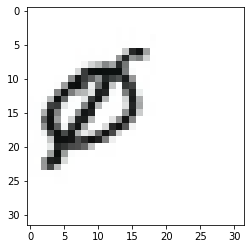

In [158]:
plt.imshow(list_Drachev_im[399])
print(y_train[399])

Бердикин Тимофей

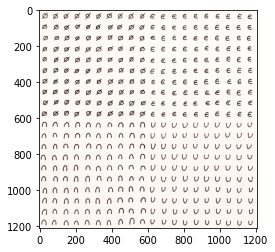

In [159]:


Berdikin_image = cv2.imread("train_2.jpg")
plt.imshow(Berdikin_image)



In [160]:
Berdikin_image.shape

(1208, 1210, 3)

In [161]:
resized_Berdikin_image = cv2.resize(Berdikin_image, dim, interpolation = cv2.INTER_AREA)

3.0


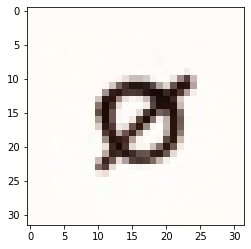

In [162]:
list_Berdikin_im = []
for i in range(0, resized_Berdikin_image.shape[0], step):
    for j in range(0, resized_Berdikin_image.shape[0], step):
        list_Berdikin_im.append(resized_Berdikin_image[i:i + step, j:j + step])
        
plt.imshow(list_Berdikin_im[46])
print(y_train[446])

0.0


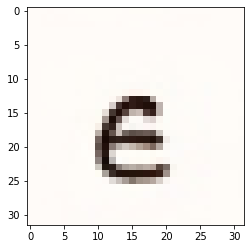

In [163]:
plt.imshow(list_Berdikin_im[130])
print(y_train[530])

1.0


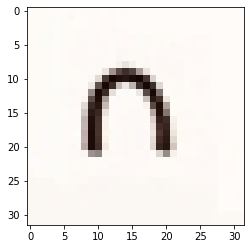

In [164]:
plt.imshow(list_Berdikin_im[221])
print(y_train[621])

2.0


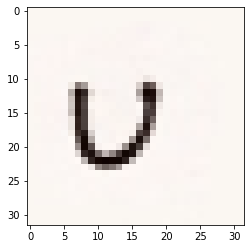

In [165]:
plt.imshow(list_Berdikin_im[399])
print(y_train[799])

Лагода Дмитрий

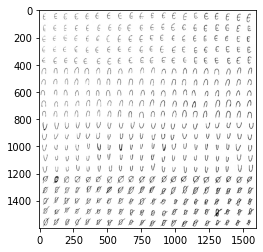

In [166]:
Lagoda_image = cv2.imread("train_1.jpg")
plt.imshow(Lagoda_image)

In [167]:
Lagoda_image.shape

(1600, 1592, 3)

In [168]:
resized_Lagoda_image = cv2.resize(Lagoda_image, dim, interpolation = cv2.INTER_AREA)

0.0


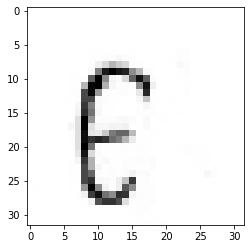

In [169]:


list_Lagoda_im = []
for i in range(0, resized_Lagoda_image.shape[0], step):
    for j in range(0, resized_Lagoda_image.shape[0], step):
        list_Lagoda_im.append(resized_Lagoda_image[i:i + step, j:j + step])

plt.imshow(list_Lagoda_im[99])
print(y_test[99])



1.0


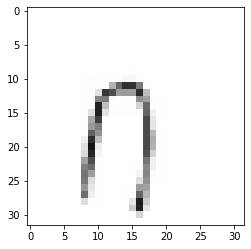

In [170]:


plt.imshow(list_Lagoda_im[130])
print(y_test[130])



2.0


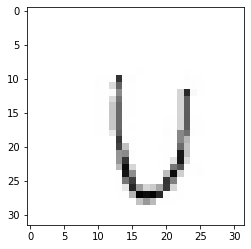

In [171]:


plt.imshow(list_Lagoda_im[202])
print(y_test[202])



3.0


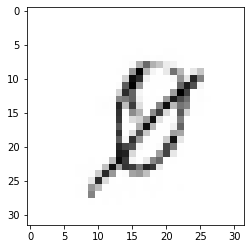

In [172]:
plt.imshow(list_Lagoda_im[344])
print(y_test[344])

In [173]:


x_train = np.array(list_Lagoda_im + list_Berdikin_im)
x_test = np.array(list_Drachev_im)




In [174]:
x_train.shape

(800, 32, 32, 3)

In [175]:
x_train_norm = x_train.astype('float32')
x_test_norm = x_test.astype('float32')
x_train_norm /= 255
x_test_norm /= 255
print('x_train shape:', x_train_norm.shape)
print(x_train_norm.shape[0], 'train samples')
print(x_test_norm.shape[0], 'test samples')

y_train_ = tf.keras.utils.to_categorical(y_train, classes)
y_test_ = tf.keras.utils.to_categorical(y_test, classes)

x_train shape: (800, 32, 32, 3)
800 train samples
400 test samples


In [176]:
epochs = 18
input_shape = (32, 32, 3)
batch_size = 128

Односвязная

In [177]:
hidden_size = 128

inp = Input(shape = (32,32,3))
flat = Flatten()(inp)
out = Dense(classes, activation='softmax')(flat)

model_ogurec = Model(inputs = inp, outputs = out) #определяем модель
model_ogurec.compile(loss = keras.losses.categorical_crossentropy,#компилируем
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model_ogurec.summary()
hist__ = model_ogurec.fit(x_train_norm, y_train_, #трениров очка
          batch_size = batch_size,
          epochs = 25, 
          verbose = 1, validation_data = (x_test_norm, y_test_)) #показали где у нас тестовые наборы validation_data = (x_test_norm, y_test_)

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 12292     
Total params: 12,292
Trainable params: 12,292
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
7/7 [==============================] - 0s 26ms/step - loss: 2.1650 - accuracy: 0.2587 - val_loss: 1.7471 - val_accuracy: 0.2525
Epoch 2/25
7/7 [==============================] - 0s 6ms/step - loss: 1.5498 - accuracy: 0.3425 - val_loss: 1.6254 - val_accuracy: 0.2650
Epoch 3/25
7/7 [==============================] - 0s 7ms/step - loss: 1.3652 - accuracy: 0.3663 - val_loss: 

In [178]:
score__ = model_ogurec.evaluate(x_test_norm, y_test_, verbose = 0) 
print('Test loss:', score__[0])
print('Test accuracy:', score__[1])

Test loss: 0.4593558609485626
Test accuracy: 0.9075000286102295


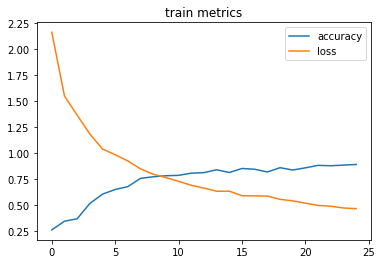

In [179]:
plt.plot(hist__.history['accuracy'])
plt.plot(hist__.history['loss'])
plt.title('train metrics')
plt.legend(['accuracy', 'loss'])

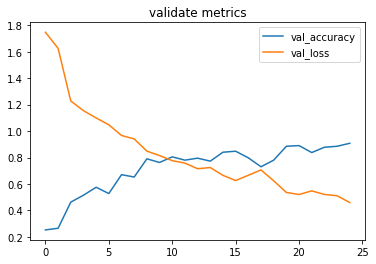

In [180]:
plt.plot(hist__.history['val_accuracy'])
plt.plot(hist__.history['val_loss'])
plt.title('validate metrics')
plt.legend(['val_accuracy', 'val_loss'])

Полносвязная 

In [181]:
hidden_size = 128

inp = Input(shape = (32,32,3))
hidden_1 = Dense(32, activation='relu')(inp)
hidden_2 = Dense(32, activation='relu')(hidden_1)
flat = Flatten()(hidden_2)
out = Dense(classes, activation='softmax')(flat)

model_ogurec = Model(inputs = inp, outputs = out) #определяем модель
model_ogurec.compile(loss = keras.losses.categorical_crossentropy,#компилируем
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model_ogurec.summary()
hist_ = model_ogurec.fit(x_train_norm, y_train_, #трениров очка
          batch_size = batch_size,
          epochs = epochs, 
          verbose = 1, validation_data = (x_test_norm, y_test_)) #показали где у нас тестовые наборы validation_data = (x_test_norm, y_test_)

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
dense_21 (Dense)             (None, 32, 32, 32)        128       
_________________________________________________________________
dense_22 (Dense)             (None, 32, 32, 32)        1056      
_________________________________________________________________
flatten_13 (Flatten)         (None, 32768)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 131076    
Total params: 132,260
Trainable params: 132,260
Non-trainable params: 0
_________________________________________________________________
Epoch 1/18
7/7 [==============================] - 1s 103ms/step - loss: 2.2894 - accuracy: 0.2175 - val_loss: 1.4803 - 

In [182]:
score_ = model_ogurec.evaluate(x_test_norm, y_test_, verbose = 0) 
print('Test loss:', score_[0])
print('Test accuracy:', score_[1])

Test loss: 0.23827509582042694
Test accuracy: 0.9300000071525574


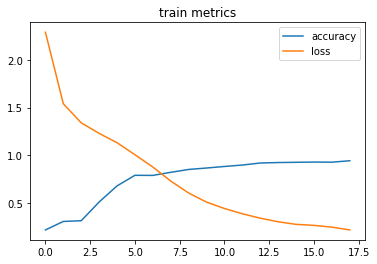

In [183]:
plt.plot(hist_.history['accuracy'])
plt.plot(hist_.history['loss'])
plt.title('train metrics')
plt.legend(['accuracy', 'loss'])

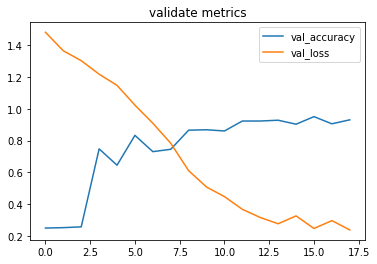

In [184]:
plt.plot(hist_.history['val_accuracy'])
plt.plot(hist_.history['val_loss'])
plt.title('validate metrics')
plt.legend(['val_accuracy', 'val_loss'])

Сверточная

In [185]:
model_conv_2 = Sequential()
model_conv_2.add(Conv2D(8, kernel_size=(3, 3), 
                strides=(1,1),
                activation='relu',
                input_shape=input_shape))
model_conv_2.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model_conv_2.add(Conv2D(16, kernel_size=(3, 3), 
                strides=(1,1),
                activation='relu',
                input_shape=input_shape))
model_conv_2.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model_conv_2.add(Flatten())
model_conv_2.add(Dense(classes, activation='softmax'))

model_conv_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model_conv_2.summary()
hist = model_conv_2.fit(x_train_norm, y_train_,
          batch_size=batch_size,
          epochs=25,
          verbose=1,
          validation_data=(x_test_norm, y_test_))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 16)        1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 1604      
Total params: 2,996
Trainable params: 2,996
Non-trainable params: 0
____________________________________________________

In [186]:
score = model_conv_2.evaluate(x_test_norm, y_test_, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07154715806245804
Test accuracy: 0.9775000214576721


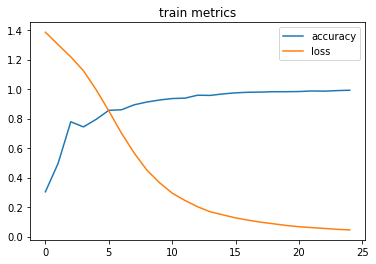

In [187]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('train metrics')
plt.legend(['accuracy', 'loss'])

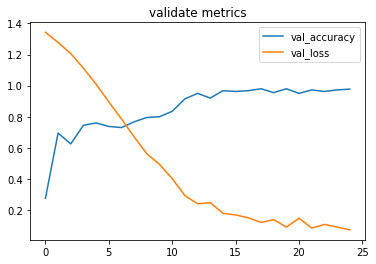

In [188]:
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['val_loss'])
plt.title('validate metrics')
plt.legend(['val_accuracy', 'val_loss'])